In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models
import astropy.units as u
from specutils import Spectrum1D, SpectralRegion
from specutils.fitting import fit_lines
from astropy.convolution import Gaussian1DKernel
from astropy.convolution import convolve
import sys



In [2]:
def lorentzian(x, a, x0):
    return 1/(np.pi)*((1/2*a)/((x-x0)**2+(1/2*a)**2))


In [3]:
data = np.loadtxt("rovib1.dat")

# amp=299790.000000/(0.2*29.979000)
amp=2
std=1.5

emin = np.min(data[:,2])
emax = np.max(data[:,2])

npoints = int((emax+500)-(emin-500))
x = np.zeros((data.shape[0], npoints))
y = np.zeros((data.shape[0], npoints))

falsedat = data[:,2]-emin+100

dr=(emax-emin)/(npoints-1)

for i in range(falsedat.shape[0]):
    x0 = falsedat[i]
    maxintens = lorentzian(x0,amp,x0)
    # print(x0,maxintens,data[i,3],falsedat.shape[0])
    check=False
    for j in range(0,npoints):
        x[i,j]=j*dr
        diff = abs(x[i,j]-x0)
        if diff<0.5 and check==False:
            x[i,j]=x0
            check=True
        y[i,j] = (lorentzian(x[i,j], amp, x0)/maxintens)*data[i,3]
        # print(x[i,j],x0,y[i,j],lorentzian(x[i,j], amp, x0),maxintens,data[i,3],falsedat.shape[0])


# for i in range(npoints):
#     print("e",np.max(y[:,i]))

funct = np.zeros((npoints))
for i in range(npoints):
    funct[i] = np.max(y[:,i])
    
    # print("e",(y[:,i]))
    # print("e",np.max(y[:,i]))


kernel = Gaussian1DKernel(stddev=std)
convoluted = convolve(funct,kernel,normalize_kernel=True,boundary='extend')
# convoluted = convoluted/np.max(convoluted)*np.max(data[:,3])
# for i in range(len(convoluted)):
#     print(convoluted[i],convoluted[i]/np.max(convoluted),np.max(convoluted))
convoluted = (convoluted/np.max(convoluted))*np.max(data[:,3])


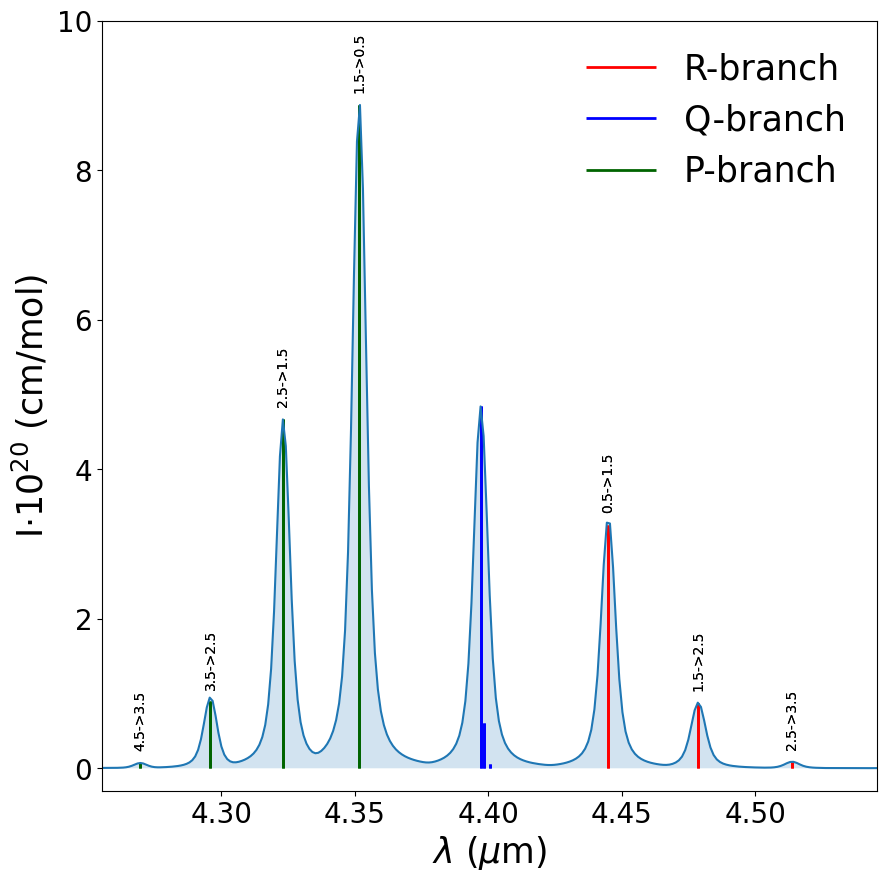

In [32]:
fig,ax = plt.subplots(figsize=(10,10))



for i in range(len(data[:,0])):
    # ax.vlines(data[:,2],0,data[:,3]*1e20,color="red")
    if data[i,0]==data[i,1]: 
        ax.vlines(299790.000000/(data[i,2]*29.979000),0,data[i,3]*1e20,lw=2,color="blue")
    if data[i,0]<data[i,1]:
        ax.vlines(299790.000000/(data[i,2]*29.979000),0,data[i,3]*1e20,lw=2,color="red")
        if data[i,3]*1e20>0.05:
            ax.annotate(str(data[i,0])+"->"+str(data[i,1]),xy=(299790.000000/(data[i,2]*29.979000)-0.0025,data[i,3]*1e20+0.2),fontsize=10,rotation=90)
    if data[i,0]>data[i,1]:
        ax.vlines(299790.000000/(data[i,2]*29.979000),0,data[i,3]*1e20,lw=2,color="darkgreen")
        if data[i,3]*1e20>0.05:
            ax.annotate(str(data[i,0])+"->"+str(data[i,1]),xy=(299790.000000/(data[i,2]*29.979000)-0.0025,data[i,3]*1e20+0.2),fontsize=10,rotation=90)

ax.plot(299790.000000/((x[1,:]+emin-100)*29.979000),(convoluted)*1e20,alpha=1)
ax.fill_between(299790.000000/((x[1,:]+emin-100)*29.979000),0,convoluted*1e20,alpha=0.2)

ax.vlines(data[0,2],0,data[0,3],lw=2,color="red",label="R-branch")
ax.vlines(data[0,2],0,data[0,3],lw=2,color="blue",label="Q-branch")
ax.vlines(data[0,2],0,data[0,3],lw=2,color="darkgreen",label="P-branch")



# ax.set_xlim(0,5)
ax.set_xlim(299790.000000/(2350*29.979000),299790.000000/(2200*29.979000))
ax.set_ylim(-0.3,10)
ax.set_xlabel(r"$\lambda$ ($\mu$m)",fontsize=25)
ax.set_ylabel(r"I$·10^{20}$ (cm/mol)",fontsize=25)
ax.legend(frameon=False,fontsize=25)

ax.tick_params(axis='both',labelsize=20)


In [33]:
fig.savefig("PHM_rovib_T30.png",dpi=300,transparent=True)